In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mymap = plt.imread('C:/Users/CORAL/Downloads/map.png')

In [20]:
df = pd.read_csv('C:/Users/CORAL/Files_Directory/Assignment 1/Mappingarea.txt')

In [21]:
df

,name,latitude,longitude
0,Rainier,46.8533,-121.7599
1,Adams,46.2024,-121.4909
2,Hood,45.3733,-121.6957
3,Jefferson,44.6743,-121.7996
4,Altera,47.2656,-122.3285
5,Boz,49.5634,-120.9054
6,Zincgty,46.4678,-121.4609
7,Seri,44.6495,-119.4120
8,Rotij,44.2134,-121.4532
9,Zipper,45.4678,-121.3269


In [24]:
Map_m = plt.imread('C:/Users/CORAL/Files_Directory/Assignment 1/M-map.png')
#Map_m = open(fname,'C:/Users/CORAL/Files_Directory/Assignment 1/M-map.html', encoding='utf-8')
#source_code = Map_m.read() 

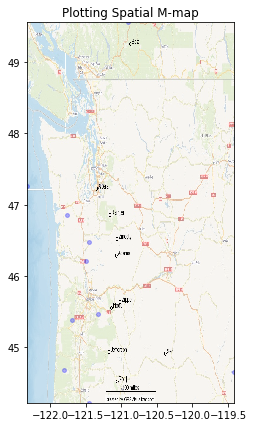

In [25]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.3, c='b', s=15)
ax.set_title('Plotting Spatial M-map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Map_m, zorder=0, extent = BBox, aspect= 'equal')

In [26]:
from geopy.distance import distance


# assumes your DataFrame is named df, and its lon and lat columns are named lon and lat. Adjust as needed.
df['coords']= zip(df.latitude, df.longitude)
# first, let's create a square DataFrame (think of it as a matrix if you like)
square = pd.DataFrame(
    np.zeros(len(df) ** 2).reshape(len(df), len(df)),
    index=df.index, columns=df.index)

def get_distance(col):
    end = df.loc[col.name]['coords']
    return df['coords'].apply(distance, args=(end,), ellipsoid='WGS-84')
    distances = square.apply(get_distance, axis=1).T

def units(input_instance):
    return input_instance.meters
    distances_meters = distances.applymap(units)

In [27]:
import pandas as pd
#first_wayp = df[['latitude','longitude']][0:1]
#first_waypoint = first_wayp.to_dict('list')
first_waypoint = 46.8533, -121.7599       #Rainer
#other_wayp = df[['latitude','longitude']][1:]
#other_waypoints = other_wayp.to_dict('list')
other_waypoints = {
    'Adams': (46.2024, -121.4909),
    'Hood': (45.3733, -121.6957),
    'Jefferson': (44.6743, -121.7996),
    'Altera': (47.2656, -122.3285),
    'Boz': (49.5634, -120.9054),
    'Zincgty': (46.4678, -121.4609),
    'Seri': (44.6495, -119.4120),
    'Rotij': (44.2134, -121.4532),
    'Zipper': (45.4678, -121.3269),
}
print(first_waypoint)
other_waypoints

(46.8533, -121.7599)


{'Adams': (46.2024, -121.4909),
 'Hood': (45.3733, -121.6957),
 'Jefferson': (44.6743, -121.7996),
 'Altera': (47.2656, -122.3285),
 'Boz': (49.5634, -120.9054),
 'Zincgty': (46.4678, -121.4609),
 'Seri': (44.6495, -119.412),
 'Rotij': (44.2134, -121.4532),
 'Zipper': (45.4678, -121.3269)}

In [28]:
type(first_waypoint)

tuple

In [29]:
from geopy.distance import distance
for other_waypoint, waypoint in other_waypoints.items():
    d = distance(first_waypoint, waypoint).m
    print (other_waypoint, d)

Adams 75240.89371968202
Hood 164582.05315666608
Jefferson 242208.34226377885
Altera 62983.6015312484
Boz 307961.72568946244
Zincgty 48581.20693159831
Seri 305538.07888987305
Rotij 294380.01318453747
Zipper 157593.40585001252


In [31]:
import pandas as pd
from scipy.spatial import distance_matrix

distance = [[46.8533, -121.7599],[46.2024, -121.4909],[45.3733, -121.6957],[44.6743, -121.7996],[47.2656, -122.3285],
           [49.5634, -120.9054],[46.4678, -121.4609],[44.6495, -119.412],[44.2134, -121.4532],[45.4678, -121.3269]]
loc_names = ['Rainer','Adams','Hood','Jefferson','Altera','Boz','Zincgty','Seri','Rotij','Zipper']
df1 = pd.DataFrame(distance, columns=['latitude', 'longitude'], index=loc_names)

In [32]:
pd.DataFrame(distance_matrix(df1.values, df1.values), index=df1.index, columns=df1.index)

,Rainer,Adams,Hood,Jefferson,Altera,Boz,Zincgty,Seri,Rotij,Zipper
Rainer,0.000000,0.704295,1.481392,2.179362,0.702351,2.841621,0.487864,3.220150,2.657656,1.451585
Adams,0.704295,0.000000,0.854020,1.558969,1.353502,3.411617,0.267090,2.594865,1.989357,0.752684
Hood,1.481392,0.854020,0.000000,0.706680,1.995303,4.263978,1.119402,2.395657,1.184979,0.380715
Jefferson,2.179362,1.558969,0.706680,0.000000,2.644725,4.970200,1.825201,2.387729,0.576560,0.923627
Altera,0.702351,1.353502,1.995303,2.644725,0.000000,2.702795,1.178649,3.917901,3.175228,2.057981
Boz,2.841621,3.411617,4.263978,4.970200,2.702795,0.000000,3.145047,5.135821,5.377972,4.117232
Zincgty,0.487864,0.267090,1.119402,1.825201,1.178649,3.145047,0.000000,2.739381,2.254413,1.008938
Seri,3.220150,2.594865,2.395657,2.387729,3.917901,5.135821,2.739381,0.000000,2.087266,2.082416
Rotij,2.657656,1.989357,1.184979,0.576560,3.175228,5.377972,2.254413,2.087266,0.000000,1.260742
Zipper,1.451585,0.752684,0.380715,0.923627,2.057981,4.117232,1.008938,2.082416,1.260742,0.000000


In [33]:
#creating a graph
graph = {
    "Altera": {
        "Rainer": 0.702,
        "Hood": 1.995,
    },
    "Rainer": {
        "Zincgty": 0.488,
    },
    "Zincgty": {
        "Adams": 0.267,
    },
     "Rainer": {
        "Zipper": 0.753,
    },
     "Zipper": {
        "Seri": 2.082,
         "Hood": 0.381,
    },
     "Hood": {
        "Jefferson": 0.707,
    },
    "Jefferson": {
        "Rotij": 2.087,
    },
    "Seri": {
        "Rotij": 0.577,
    },
}

In [37]:
num_nodes = 9
destination_node = 8

with open('C:/Users/CORAL/Files_Directory/Assignment 1/Nodes.txt') as f:
    infile = f.readlines()

def map_graph_to_distance_matrix(in_file):

    # First let's set of the distance matrix Q with inf everywhere
    Q = np.ones((num_nodes, num_nodes))
    Q = Q * np.inf

    # Now we read in the data and modify Q
    #infile = open(in_file)
    for line in infile:
        elements = line.split(',')
        node = elements.pop(0)
        node = int(node[4:])    # convert node description to integer
        if node != destination_node:
            for element in elements:
                destination, cost = element.split()
                destination = int(destination[4:])
                Q[node, destination] = float(cost)
        Q[destination_node, destination_node] = 0

    f.close()
    return Q

In [40]:
#dynamic programming method for shortest path problem
#using bellman equation principle
def bellman(J, Q):
    num_nodes = Q.shape[0]
    next_J = np.empty_like(J)
    for v in range(num_nodes):
        next_J[v] = np.min(Q[v, :] + J)
    return next_J

#compute cost_to_go
def compute_cost_to_go(Q):
    J = np.zeros(num_nodes)      # Initial guess
    next_J = np.empty(num_nodes)  # Stores updated guess
    max_iter = 500
    i = 0

    while i < max_iter:
        next_J = bellman(J, Q)
        if np.allclose(next_J, J):
            break
        else:
            J[:] = next_J   # Copy contents of next_J to J
            i += 1

    return(J)

In [41]:
#defining selection of the best path
def print_best_path(J, Q):
    sum_costs = 0
    current_node = 0
    while current_node != destination_node:
        print(current_node)
        # Move to the next node and increment costs
        next_node = np.argmin(Q[current_node, :] + J)
        sum_costs += Q[current_node, next_node]
        current_node = next_node

    print(destination_node)
    print('Cost: ', sum_costs)

In [42]:
#reading problem's network graph and computing best path
Q = map_graph_to_distance_matrix('C:/Users/CORAL/Files_Directory/Assignment 1/Nodes.txt')
J = compute_cost_to_go(Q)
print_best_path(J, Q)

0
5
6
8
Cost:  4.789


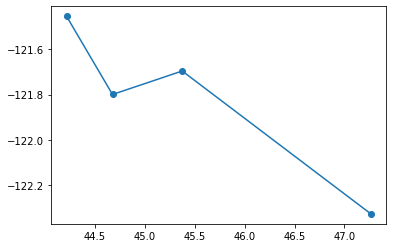

In [48]:
#plotting coordinates of the shortest path 
points1x = [47.2656, 45.3733, 44.6743, 44.2134]
points1y = [-122.3285, -121.6957, -121.7996, -121.4532]
plt.scatter(points1x, points1y)
plt.plot(points1x, points1y)

<AxesSubplot:>

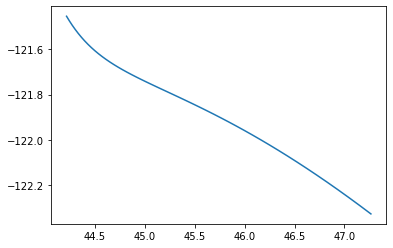

In [57]:
#bezier curve of degree(number of control points, n-1) of 3
import bezier
import numpy as np
import matplotlib.pyplot as plt
nodes = np.asfortranarray([
 [47.2656, 45.3733, 44.6743, 44.2134],
 [-122.3285, -121.6957, -121.7996, -121.4532],   
])
curve = bezier.Curve(nodes, degree=3)
curve.length
curve.implicitize()
curve.plot(50)

In [58]:
curve.length

3.1867946385729464

In [59]:
curve.implicitize()

(1624504606244558599641564213371682156635291566144606611310760893165422858985963257856*x**3 + 3921803201056815949535140662099185587387535705717642899110897698065670694473375416320*x**2*y + 261164349288818412855997591261332722816019010044928968066949829378734138133004920291328*x**2 + 3155944749494100656937029945463417561220672004043791952894260578738238658452442316800*x*y**2 + 434477238721420719825376018457188104617027198487247128691251874468256072705634767732736*x*y + 15720014470681554534681966035942710055249331899848740181063030739201461984929378163752960*x + 846548279898002410045854525772425371571086336484120462890115304770174926238777344000*y**3 + 173769406705404068211010177502866603814453872199286681404654253037791017141613103153152*y**2 + 11773568502780793443109095265833981139017642002686770173212175097461618978029269852094464*y + 243271682823965439883038253196191172011225538282078652588667855347978135471751932571472177)/971334446112864535459730953411759453321203419526069760625906

<AxesSubplot:>

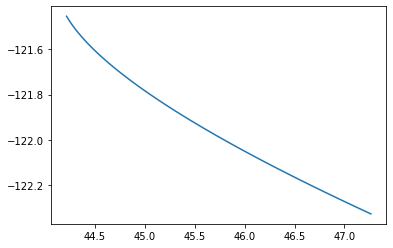

In [53]:
#bezier curve of degree of 2
import bezier
import numpy as np
import matplotlib.pyplot as plt
nodes = np.asfortranarray([
 [47.2656, 44.6743, 44.2134],
 [-122.3285, -121.7996, -121.4532],   
])
curve = bezier.Curve(nodes, degree=2)
curve.length
curve.implicitize()
curve.plot(50)

In [54]:
curve.length

3.187431806898254

In [55]:
curve.implicitize()

3*(272222291242490957159716816554231102242521807356690432*x**2 + 6355532813840951152071233405100108362569591361026129920*x*y + 740423169857920239359520466098004924360078461687667097600*x + 37095416730428466101573094489316072557778254219234508800*y**2 + 8719861908120996884331825368310412074428969514837917827072*y + 512724641218721457969814018996220938314552020599253665762255)/24519928653854221733733552434404946937899825954937634816

<AxesSubplot:>

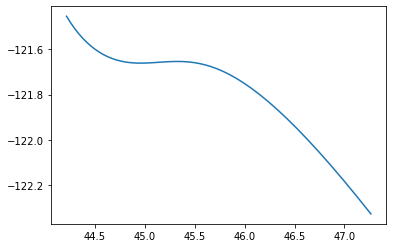

In [60]:
#bezier curve of degree of 4
import bezier
import numpy as np
import matplotlib.pyplot as plt
nodes = np.asfortranarray([
 [47.2656, 45.4678, 45.3733, 44.6743, 44.2134],
 [-122.3285, -121.3269, -121.6957, -121.7996, -121.4532],   
])
curve = bezier.Curve(nodes, degree=4)
curve.plot(50)

In [61]:
curve.length

3.2326528232508194

In [62]:
curve.implicitize()

3*(221416182006326210485588729163718602729805920613241006996296889947259342366934367830895580192105922046499749888*x**4 + 1924407310277152534166651748189404712174497018430396431194057796923448547714012128984433965323262713677125517312*x**3*y + 181524989415808617146413902317515656397571455869259963033887268839084256075759977235335255647497441887781811912704*x**3 + 6272142344606842768667852941683113952587794125620759367801590773388880547647030029025732447339025740157113335808*x**2*y**2 + 1241461185677995329692227959090148137650197448230048976989580929576391448281861252087464082028870801712798771445760*x**2*y + 62617305056498302841830628551840791666261558012576955805475505510838141916816145689303498499716617365455327039848448*x**2 + 9085572449800608207360515806873169466121759838482207983022567570973537326100515433634508362951232804931588063232*x*y**3 + 2727625735234083818850068670009625926633094142402084144266577577601600672290053758527514679756117939157586975653888*x*y**2 + 2741822598025